In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json

# 📌 Extracción

In [6]:
json = 'TelecomX_Data.json'
df = pd.read_json(json)
df.head(1)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [10]:
df['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

#🔧 Transformación

## Expansion de columnas

In [14]:
# 1. Expandir 'customer' 
customer_expanded = pd.json_normalize(df['customer'])
customer_expanded.columns = ['customer_' + col for col in customer_expanded.columns]
df = df.drop(columns='customer').join(customer_expanded)

# 2. Expandir 'phone'
phone_expanded = pd.json_normalize(df['phone'])
phone_expanded.columns = ['phone_' + col for col in phone_expanded.columns]
df = df.drop(columns='phone').join(phone_expanded)

# 3. Expandir 'internet'
internet_expanded = pd.json_normalize(df['internet'])
internet_expanded.columns = ['internet_' + col for col in internet_expanded.columns]
df = df.drop(columns='internet').join(internet_expanded)

# 4. Expandir 'account'
account_expanded = pd.json_normalize(df['account'])
account_expanded.columns = ['account_' + col for col in account_expanded.columns]
df = df.drop(columns='account').join(account_expanded)



df.head(2)




,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


## 

In [15]:
df['account_Charges.Monthly'] = df['account_Charges.Monthly'].astype(float)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

# 📊 Carga y análisis

In [17]:
df.isnull().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
dtype: int64

In [18]:
df[df['account_Charges.Total'].isnull()]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [19]:
df[df['customer_tenure']== 0]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


## Verificacion de cliente 'Churn'

In [20]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)  # Porcentajes

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [21]:
df[df['Churn']== '']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


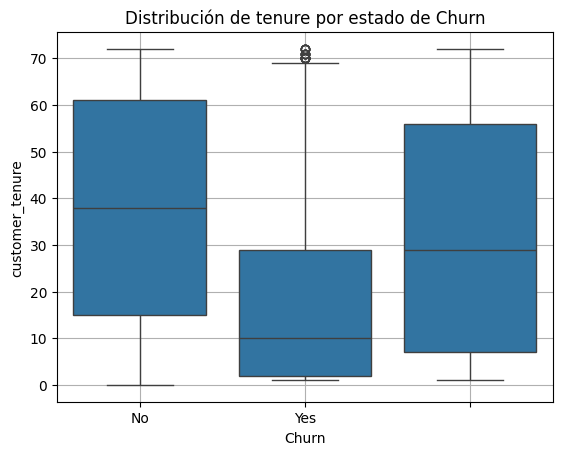

In [22]:
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Distribución de tenure por estado de Churn')
plt.grid()
plt.show()

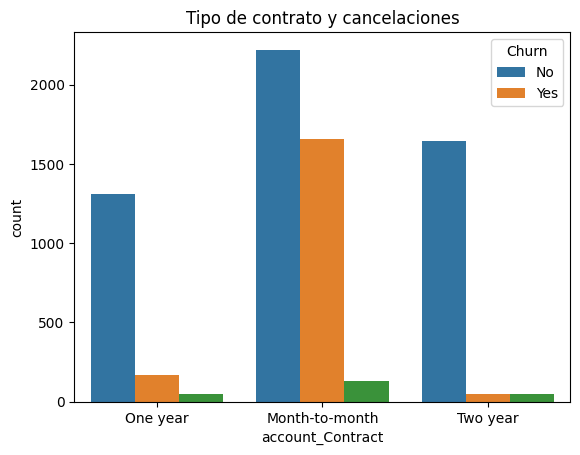

In [23]:
sns.countplot(x='account_Contract', hue='Churn', data=df)
plt.title('Tipo de contrato y cancelaciones')
plt.show()

## Cancelaciones y grupos etarios

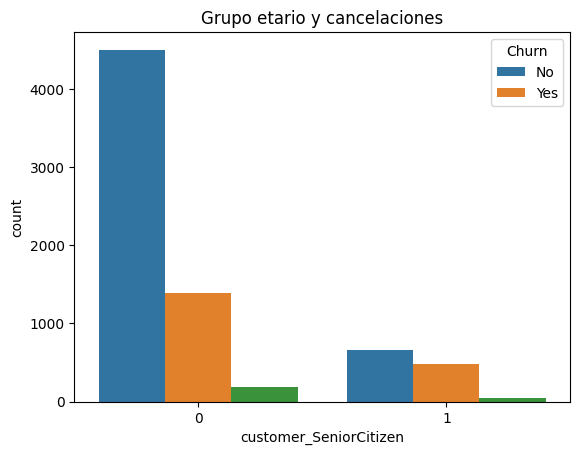

In [24]:
sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df)
plt.title('Grupo etario y cancelaciones')
plt.show()

In [25]:
churn_young = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 0)]
young = df[df['customer_SeniorCitizen'] == 0]
churn_senior = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 1)]
senior = df[df['customer_SeniorCitizen'] == 1]
print(f"Total de clientes: {len(df)}")
print(f"Total de clientes jóvenes: {len(young)}")
print(f"Total de clientes mayores: {len(senior)}")
print(f"Churn menores de 65 años: {len(churn_young)}")
print(f"Churn mayores de 65 años: {len(churn_senior)}")
print(f'porcentaje de cancelaciones entre menores de 65 años {(len(churn_young) / len(young)) * 100:.2f}%')
print(f'porcentaje de cancelaciones de mayores de 65 años {(len(churn_senior) / len(senior)) * 100:.2f}%')



Total de clientes: 7267
Total de clientes jóvenes: 6085
Total de clientes mayores: 1182
Churn menores de 65 años: 1393
Churn mayores de 65 años: 476
porcentaje de cancelaciones entre menores de 65 años 22.89%
porcentaje de cancelaciones de mayores de 65 años 40.27%


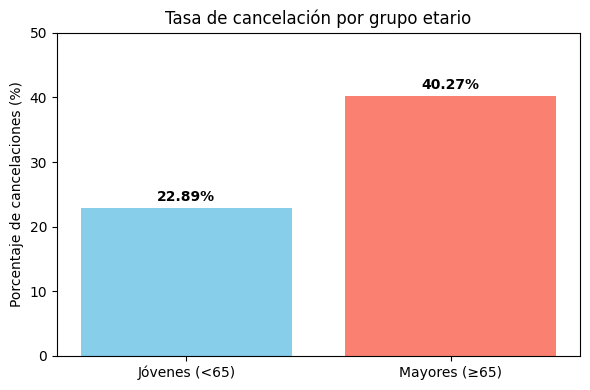

In [26]:

# Datos
grupos = ['Jóvenes (<65)', 'Mayores (≥65)']
tasas = [22.89, 40.27]

# Crear gráfico
plt.figure(figsize=(6, 4))
plt.bar(grupos, tasas, color=['skyblue', 'salmon'])

# Títulos y etiquetas
plt.title('Tasa de cancelación por grupo etario')
plt.ylabel('Porcentaje de cancelaciones (%)')
plt.ylim(0, 50)

# Mostrar porcentaje arriba de las barras
for i, tasa in enumerate(tasas):
  plt.text(i, tasa + 1, f'{tasa:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Cancelaciones y servicios contratados

#📄Informe final

En un principio llamó la atención la existencia de datos nulos en la columna de cargos totales. Al analizar esas filas notamos que en esos casos la columna 'Tenure' está en 0. Por ello inferimos que son clientes nuevos a los cuales aún no se les ha facturado ya que ninguno de ellos tienen un registro afirmativo en la columna 'Churn'. 
Por otra parte hay 224 registros que no tienen valores en la columna Churn. No se puede sacar ninguna conclusión sobre estos casos ya que todos tienen un Tenure distinto de 0, tienen contrato y valores en la columna de cargos totales. Solo podemos decir al respecto que, simplemente, los datos no fueron cargados.
En el diagrama de caja se puede ver que la taza de cancelación es mas marcada en los primeros meses y que la mediana ronda los 10 meses. Quienes abandonan el servicio con alta antigüedad son poco frecuentes. 
En cambio, los que permanecen tienden a tener una relación más larga con la empresa.
Esto indica que el riesgo de Churn es mayor en los primeros meses. Es aconsejable explorar estrategias específicas de fidelización para los clientes nuevos.
Por su parte, el grafico de barras nos muestra que el tipo de contrato mas común entre los clientes que abandonan el servicio es el de mes a mes. Problablemente sea necesario revisar el costo de los planes del servicio ya que es notorio que la clientela no puede comprometerse a períodos mas extensos. Respecto a esto, el grafico de barras 'Tipo de servicio contratado y cancelaciones' nos muestra que el servicio con mas cancelaciones es el de internet por fibra óptica.
El servicio de fibra óptica, a pesar de ser avanzado y probablemente más caro, es el que más clientes pierde.
Esto puede deberse a:
* Costos elevados.
* Problemas de calidad o soporte.
* Mala experiencia del cliente (aunque no lo vemos directamente en estos datos).
Entre los clientes que cancelan el servicio se puede notar que los menores de 65 años superan ampliamente a los mayores. No obstante, el porcentaje es significativamente menor ya que, entre quienes cancelan el servicio estos solo representan el 22%, mientras que los mayores suman el 40% .

## Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente